# ChiantiPy Continuum Loss Rate Testing

In [1]:
import numpy as np
from scipy.interpolate import splrep,splev
import matplotlib.pyplot as plt
import ChiantiPy.core as ch
import ChiantiPy.tools.util as ch_util
import ChiantiPy.tools.io as ch_io
import ChiantiPy.tools.constants as ch_const
import ChiantiPy.tools.data as ch_data
import astropy.units as u
import astropy.constants as const
import hissw

%matplotlib inline

 using cli
 using CLI for selections
 reading chiantirc file


In [ ]:
gf_info = ch_io.gffintRead()

In [ ]:
gf_info.keys()

In [ ]:
gf_info['g2'].shape

In [ ]:
gf_info['gffint'].shape

In [ ]:
plt.plot(np.exp(gf_info['g2']),gf_info['gffint'])
#plt.xscale('log')
#plt.yscale('log')
#plt.ylim([1e-1,10])
#plt.xlim([1,1e3])
#plt.axhline(y=1.2,color='k',linestyle='--')

In [ ]:
(const.h.cgs*const.c.cgs/const.k_B.cgs)

In [ ]:
(const.Ryd.cgs*const.h.cgs*const.c.cgs/const.k_B.cgs).to(u.MK)

In [ ]:
cff = 4.*np.pi*16./3.*np.sqrt(np.pi/6.)*(const.e.gauss**6)/(const.c.cgs**2)/(const.m_e.cgs**1.5)/np.sqrt(const.k_B.cgs)

In [ ]:
((cff*const.k_B.cgs/const.h.cgs/const.c.cgs)*u.K**0.5).to(u.erg*u.cm**3/u.s)

In [69]:
cff_khc = 8./3.*np.sqrt(np.pi/6.)*(const.h.cgs**2)*(const.alpha.cgs**3)/(np.pi**2)*(const.k_B.cgs**0.5)/(const.m_e.cgs**1.5)

In [75]:
cff_khc.unit

Unit("erg(5/2) s2 / (g(3/2) K(1/2))")

In [76]:
cff_khc.to(u.erg*u.cm**3/u.s*u.K**(-0.5))

<Quantity 1.4255565263832292e-27 cm3 erg / (K(1/2) s)>

In [67]:
(8./3.*np.sqrt(np.pi/6.)*(ch_const.planck**2)*(ch_const.fine**3)/(np.pi**2)
                     * (ch_const.boltzmann**0.5)/(ch_const.emass**(3./2.)))

1.4255573957578986e-27

In [ ]:
ch_const.ryd2erg/ch_const.boltzmann

In [ ]:
ch_io.fblvlRead('/usr/local/ssw/packages/chianti/dbase/fe/fe_14/fe_14.fblvl')['pqn']

In [ ]:
ch_const.ryd2erg

In [ ]:
ch_io.ipRead()[0,0]*ch_const.ev2Erg

In [ ]:
2.051e-27*const.k_B.cgs/const.h.cgs/const.c.cgs

In [66]:
(8./3.*np.sqrt(np.pi/6.)*(ch_const.planck**2)*(ch_const.fine**3)/(np.pi**2)
                     * (ch_const.boltzmann**(1./2.))/(ch_const.emass**(3./2.)))

1.4255573957578986e-27

## CHIANTI IDL Radiative Losses

In [44]:
script="""
common elements,abund,abund_ref,ioneq,ioneq_logt,ioneq_ref
!abund_file="/usr/local/ssw/packages/chianti/dbase/abundance/sun_coronal_1992_feldman.abund"
; read abundance and ionization equilibrium
abundfile="/usr/local/ssw/packages/chianti/dbase/abundance/sun_coronal_1992_feldman.abund"
read_abund, abundfile, abund, abund_ref
ioneqfile="/usr/local/ssw/packages/chianti/dbase/ioneq/chianti.ioneq"
read_ioneq, ioneqfile, ioneq_logt, ioneq, ioneq_ref

;common elements,ioneq_t
ioneq_t = ioneq_logt

print,!abund_file

fb_rad_loss, temp_fb, int_fb, /no_setup
ff_rad_loss, temp_ff, int_ff, /no_setup
"""
save_vars = ['temp_fb','temp_ff','int_fb','int_ff']

In [45]:
ssw_runner = hissw.ScriptMaker(ssw_pkg_list=['chianti'],ssw_path_list=['chianti'])

In [46]:
rad_loss_ssw = ssw_runner.run([(script,{})],save_vars=save_vars,verbose=True)

SSW  setup will include: <gen chianti>

Type <sswidl> to start SSW IDL
--------------------------------------------------------
Running SSW, Last Updated: Wed Nov 2 22:22:51 GMT 2005
 
PROBLEMS? - e-mail TO: freeland@penumbra.nascom.nasa.gov
--------------------------------------------------------
IDL Version 8.5 (linux x86_64 m64). (c) 2015, Exelis Visual Information Solutions, Inc., a subsidiary of Harris Corporation.
Installation number: 401801-1.
Licensed for use by: Rice University

Executing SSW IDL_STARTUP for: GEN
Invalid MIT-MAGIC-COOKIE-1 key% DEVICE: Unable to connect to X Windows display: :0.0
Executing SSW IDL_STARTUP for: CHIANTI
% Compiled module: USE_CHIANTI.

---------------------------------------------------------------
                  Welcome to the CHIANTI database 
                   for astrophysical spectroscopy. 
       For current information see the CHIANTI home page:
                     www.chiantidatabase.org   
 For any comments and questions please sig

## ChiantiPy Continuum Radiative Losses

In [5]:
temperature = np.logspace(4,9,200)
chpy_ff_loss = np.zeros(temperature.shape)
chpy_fb_loss = np.zeros(temperature.shape)

In [6]:
for ion in ch_data.MasterList:
    chpy_cont = ch.Continuum(ion,temperature)
    chpy_cont.calculate_free_free_loss()
    chpy_ff_loss += chpy_cont.free_free_loss
    try:
        chpy_cont.calculate_free_bound_loss()
        chpy_fb_loss += chpy_cont.free_bound_loss
    except ValueError:
        print('No free-bound info for {}'.format(ion))
        pass

No free-bound info for na_11
No free-bound info for p_15
No free-bound info for cl_17
No free-bound info for k_19
No free-bound info for na_10
No free-bound info for p_14
No free-bound info for cl_16
No free-bound info for k_18
No free-bound info for zn_29
No free-bound info for na_9
No free-bound info for p_13
No free-bound info for k_17
No free-bound info for ti_20
No free-bound info for cr_22
No free-bound info for mn_23
No free-bound info for co_25
No free-bound info for zn_28
No free-bound info for na_8
No free-bound info for p_12
No free-bound info for cl_14
No free-bound info for k_16
No free-bound info for ti_19
No free-bound info for cr_21
No free-bound info for mn_22
No free-bound info for co_24
No free-bound info for zn_27
No free-bound info for fe_3d
No free-bound info for fe_2d
No free-bound info for na_7
No free-bound info for p_11
No free-bound info for cl_13
No free-bound info for k_15
No free-bound info for ti_18
No free-bound info for cr_20
No free-bound info for mn_2

## Compare

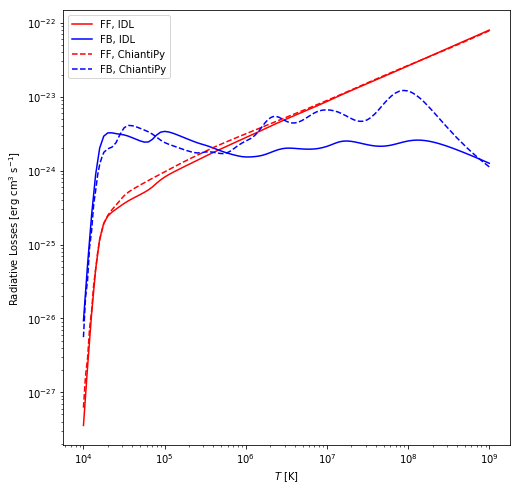

In [78]:
plt.figure(figsize=(8,8))
plt.plot(rad_loss_ssw['temp_ff'],rad_loss_ssw['int_ff'],'r',label='FF, IDL')
plt.plot(rad_loss_ssw['temp_fb'],rad_loss_ssw['int_fb'],'b',label='FB, IDL')
plt.plot(temperature,chpy_ff_loss,'--r',label='FF, ChiantiPy')
plt.plot(temperature,chpy_fb_loss,'--b',label='FB, ChiantiPy')
plt.yscale('log')
plt.xscale('log')
plt.xlabel(r'$T$ [K]')
plt.ylabel(r'Radiative Losses [erg cm$^3$ s$^{-1}$]')
#plt.ylim([1e-28,1e-21])
plt.legend(loc='best')

In [ ]:
test = ch.Continuum('mg_12',temperature)

In [ ]:
n0 = ch_io.fblvlRead('.'.join([ch_util.zion2filename(test.Z, test.stage), 'fblvl']))['pqn'][0]
if test.Z - test.stage > 22:
    zeta_0 = test.Z - test.stage + 55
elif 8 < test.Z - test.stage <= 22:
    zeta_0 = test.Z - test.stage + 27
elif 0 < test.Z - test.stage <= 8:
    zeta_0 = test.Z - test.stage + 9
else:
    zeta_0 = test.Z - test.stage + 1
z0 = np.sqrt(test.ionization_potential/ch_const.ryd2erg)*n0
scaled_energy = ch_const.ryd2erg/ch_const.boltzmann/test.temperature

In [ ]:
f2_1 = (0.9
        *zeta0
        *(z0**4)
        /(n0**5)
        *np.exp(scaled_energy*(z0**2)/(n0**2)))
f2_2 = 0.42*n0**(-1.5)*test.stage**4*np.exp(scaled_energy*test.stage**2/((n0 + 1)**2))

In [ ]:
fake_gf = (scaled_energy
           *test.abundance
           *test.ioneq_one()
           *(f2_1 + f2_2))

In [ ]:
plt.plot(test.temperature,fake_gf)
plt.xscale('log')

In [ ]:
for ion in ch_data.MasterList:
    test = ch.Continuum(ion,temperature)
    try:
        plt.plot(test.temperature,test.mewe_gaunt_factor(),'b-',alpha=0.5)
    except ValueError:
        pass
#plt.plot(test.temperature,fake_gf,'--r')
plt.axhline(y=1,linestyle='--',color='k')
plt.ylim([1e-2,10])
plt.xscale('log')
plt.yscale('log')